<a href="https://colab.research.google.com/github/inokchoi/AIStudy/blob/main/KNN%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google Drive Mount**

- Google Server에서 이용되는 만큼 데이터 또한 Google Drive에 있어야 함
- 아래 code를 통해 이 ipynb 파일과 Google Drive를 연결하며 읽기/쓰기 권한을 획득

In [ ]:
from google.colab import auth
from google.colab import drive

auth.authenticate_user()
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**Library**




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

**Data Loading & Setting**




In [ ]:
dir = './gdrive/My Drive/Colab Notebooks/19-2 smart/'

trainData = np.genfromtxt(dir+'process_data_train.csv',delimiter=',', skip_header=1)
X_train = trainData[:,:-1]
y_train = trainData[:,-1]

In [ ]:
testData = np.genfromtxt(dir+'process_data_test.csv',delimiter=',', skip_header=1)
X_test = testData[:,:-1]
y_test = testData[:,-1]

**Initial Model Declaration**




In [ ]:
neighbors_value = 3
kNN_classifier = KNeighborsClassifier(n_neighbors = neighbors_value)

**Training Model**




In [ ]:
kNN_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Prediction**




In [ ]:
y_hat = kNN_classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_hat)
print(accuracy)

0.7272727272727273


**Plotting Accuracies According to the Number of neighbers**




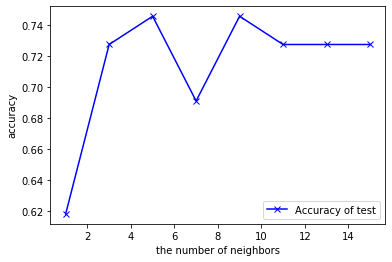

In [ ]:
import matplotlib.pyplot as plt
test_result = []
k_neighbors = [1,3,5,7,9,11,13,15]

for k_neighbor in k_neighbors:
    kNN_classifier = KNeighborsClassifier(n_neighbors = k_neighbor)
    kNN_classifier.fit(X_train,y_train)

    y_hat = kNN_classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_hat)
    test_result.append(accuracy)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_neighbors, test_result, '-x', c='blue', label="Accuracy of test")
plt.xlabel('the number of neighbors')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()